Task 3 - Exploratory Data Analysis - Retail

Objective:
* Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
* As a business manager, try to find out the weak areas where you can work to make more profit.
* What all business problems you can derive by exploring the data?


Author: Adarsh Priyadarshi

Step 1: Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Loading the data

In [2]:
df=pd.read_csv('./SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Step 3: Data Cleaning and Pre-processing

In [4]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
df.shape

(9994, 13)

In [6]:
#Distinct entries in particular coloumns
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
#Checking the missing values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
#Checking the duplicated data
df.duplicated().sum()

17

In [10]:
#Dropping duplicate data
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [11]:
#Distinct entries in particular coloumns after dropping duplocates
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [12]:
#Dropping unwanted rows from dataset
df=df.drop(['Postal Code'],axis=1)
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Step 4: Exploratory Data Analysis

In [13]:
#Heatmap for correlation
corr=df.corr()

C:\Users\adars\AppData\Local\Temp\ipykernel_9088\894155005.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


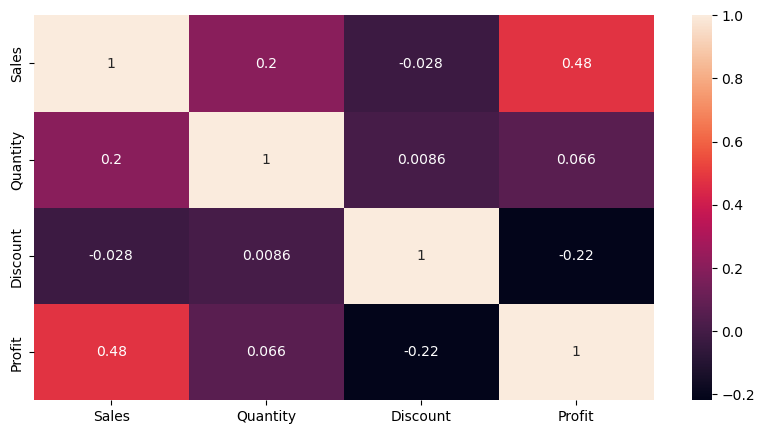

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True)
plt.show()

* Statewise Analysis

In [15]:
df_state=df['State'].value_counts()
df_state

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

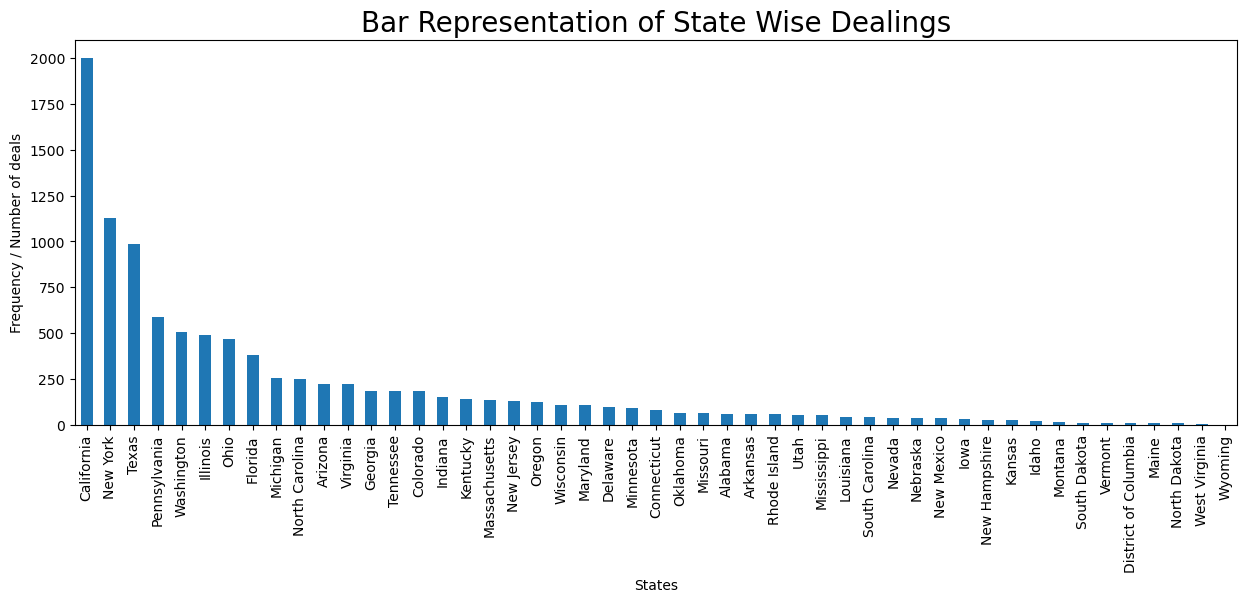

In [16]:
df_state.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('States')
plt.title('Bar Representation of State Wise Dealings', fontsize = 20)
plt.show()

In [17]:
df_state.mean()

203.9591836734694

In [18]:
#Statewise analysis of Profit, Discount and Sales
df_state1=df.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
df_state1.head()

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351


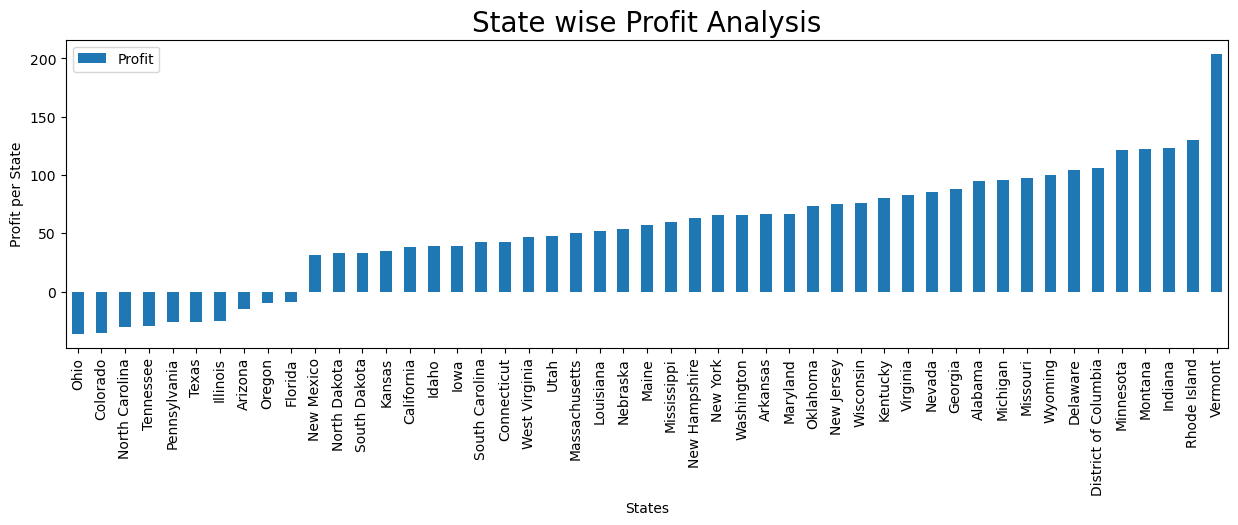

In [19]:
#Statewise Profit Analysis
df_state2=df_state1.sort_values('Profit')
df_state2[['Profit']].plot(kind = 'bar', figsize = (15,4))
plt.title('State wise Profit Analysis', fontsize = 20)
plt.ylabel('Profit per State')
plt.xlabel('States')
plt.show()

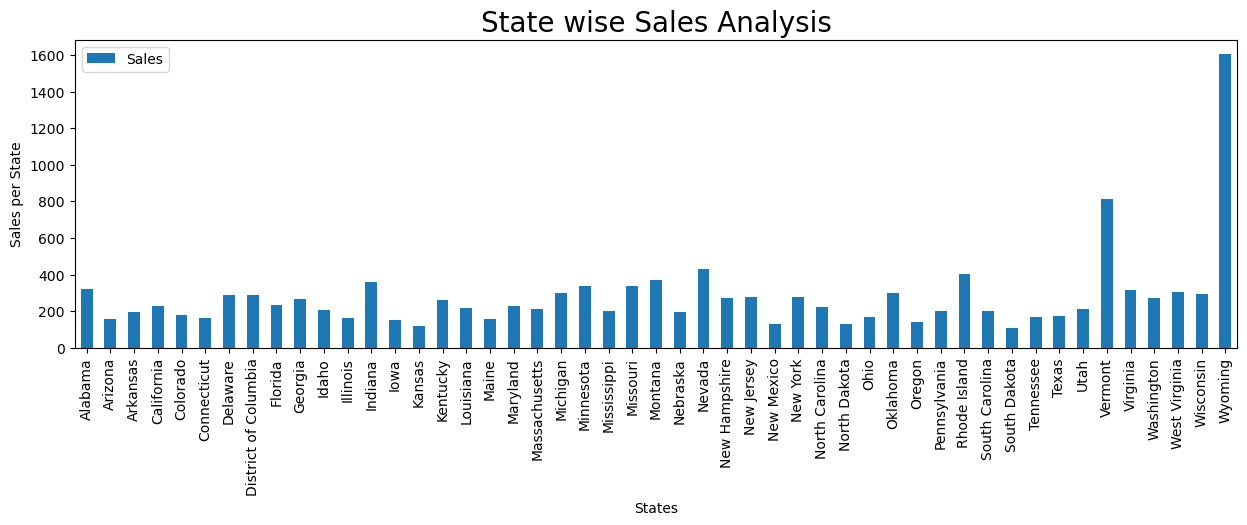

In [20]:
df_state1[['Sales']].plot(kind = 'bar', figsize = (15,4))
plt.title('State wise Sales Analysis', fontsize = 20)
plt.ylabel('Sales per State')
plt.xlabel('States')
plt.show()

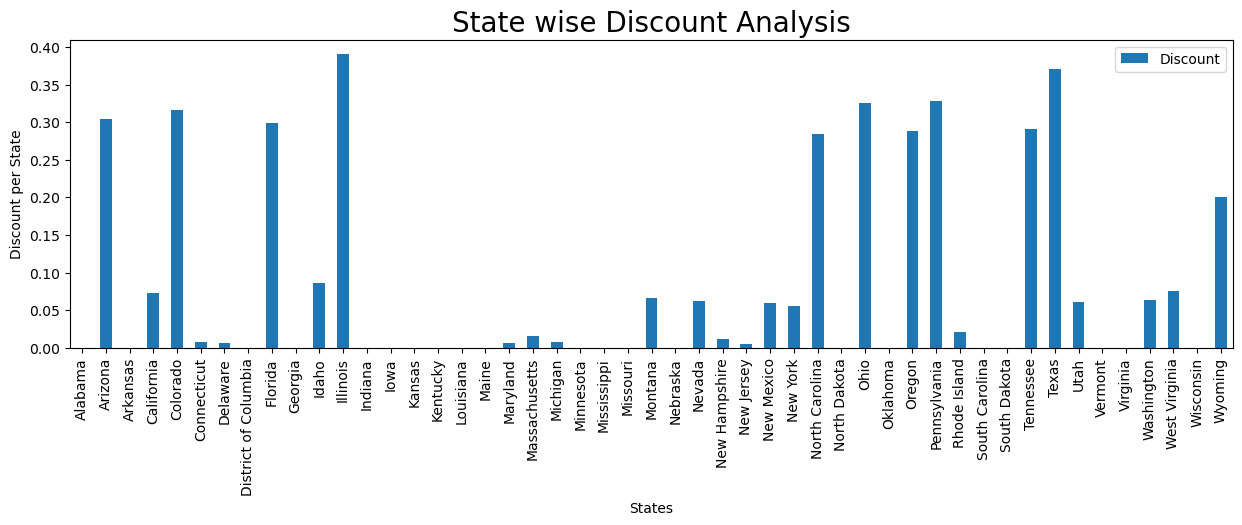

In [21]:
df_state1[['Discount']].plot(kind = 'bar', figsize = (15,4))
plt.title('State wise Discount Analysis', fontsize = 20)
plt.ylabel('Discount per State')
plt.xlabel('States')
plt.show()

Observations from Statewise Analysis :-
* Highest Number of deal = Califonia
* Lowest Number of deal = Wyoming
* Highest Profit = Vermont
* Lowest Profit = Ohio
* Highest amount of sales= Wyoming
* Lowest amount of sales= South Dakota
* Highest discount offering = Illinois


* Citywise Analysis

In [22]:
df_city=df['City'].value_counts()
df_city_head=df_city.head(50)
df_city_head

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Dallas           157
Jacksonville     125
Detroit          115
Newark            95
Richmond          90
Jackson           82
Columbia          81
Aurora            68
Phoenix           63
Long Beach        61
Arlington         60
San Antonio       59
Miami             57
Louisville        57
Rochester         53
Charlotte         52
Henderson         51
Lakewood          49
Lancaster         46
Fairfield         45
Milwaukee         45
Denver            44
Lawrence          44
Baltimore         43
Cleveland         42
Pasadena          42
San Jose          42
Fayetteville      41
Salem             40
Atlanta           39
Austin            39
Franklin          37
Tampa             36
Wilmington        36
Huntsville        36
Decatur           35
Toledo            32
Tucson       

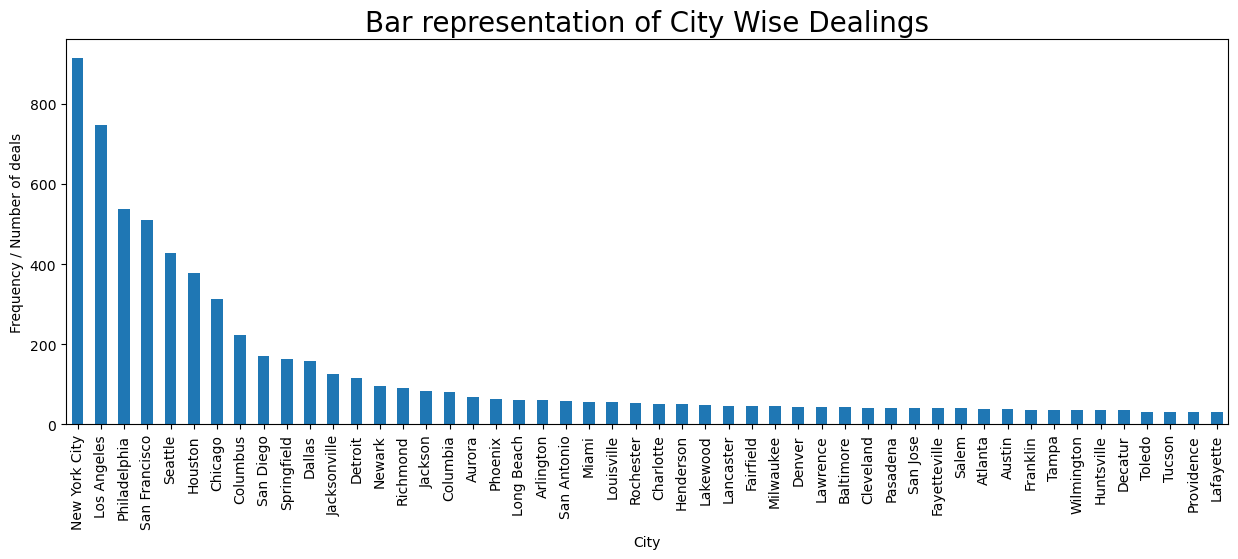

In [23]:
df_city_head.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('City')
plt.title('Bar representation of City Wise Dealings', fontsize = 20)
plt.show()

In [24]:
df_city_head.mean()

132.32

In [25]:
#City wise analysis of Profit, Discount and Sales
df_city1=df.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()
df_city1.head()

,Sales,Discount,Profit
City,,,
Aberdeen,25.500000,0.000000,6.630000
Abilene,1.392000,0.800000,-3.758400
Akron,129.999333,0.357143,-8.887410
Albuquerque,158.582857,0.057143,45.292007
Alexandria,344.973125,0.000000,19.913644


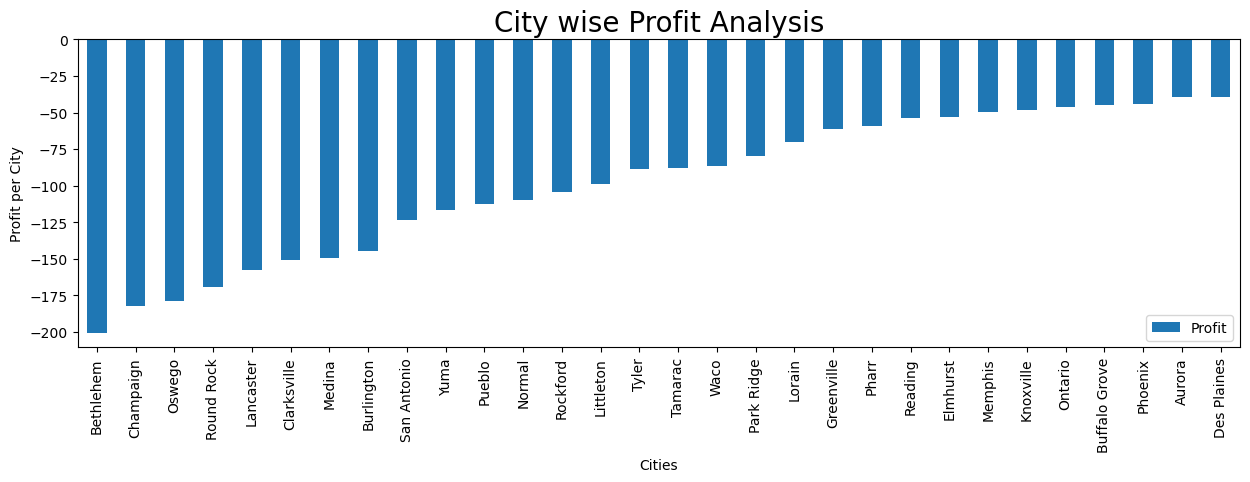

In [26]:
#Citywise Profit Analysis
df_city2=df_city1.sort_values('Profit')
df_city2_head=df_city2.head(30)
df_city2_head[['Profit']].plot(kind = 'bar', figsize = (15,4))
plt.title('City wise Profit Analysis', fontsize = 20)
plt.ylabel('Profit per City')
plt.xlabel('Cities')
plt.show()

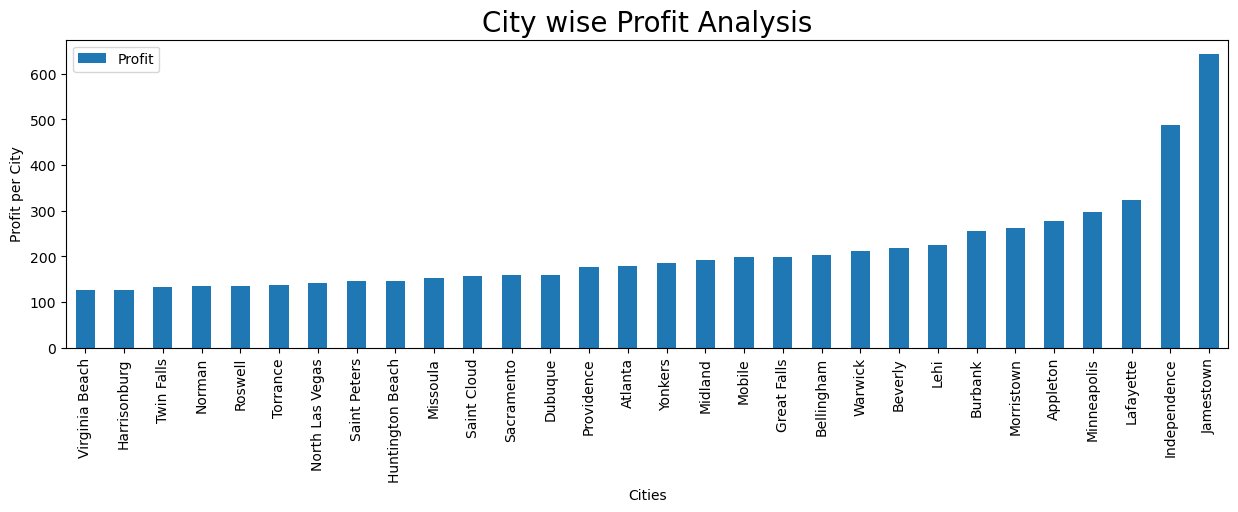

In [27]:
df_city2_tail=df_city2.tail(30)
df_city2_tail[['Profit']].plot(kind = 'bar', figsize = (15,4))
plt.title('City wise Profit Analysis', fontsize = 20)
plt.ylabel('Profit per City')
plt.xlabel('Cities')
plt.show()

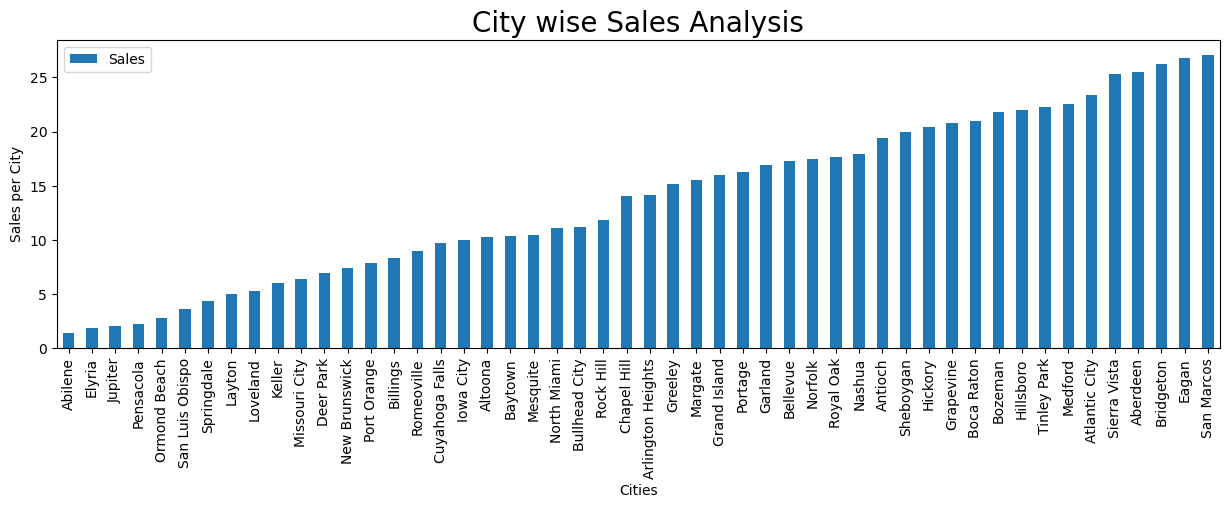

In [28]:
df_city_sales=df_city1.sort_values('Sales')
df_city_sales.head(50)[['Sales']].plot(kind = 'bar', figsize = (15,4))
plt.title('City wise Sales Analysis', fontsize = 20)
plt.ylabel('Sales per City')
plt.xlabel('Cities')
plt.show()

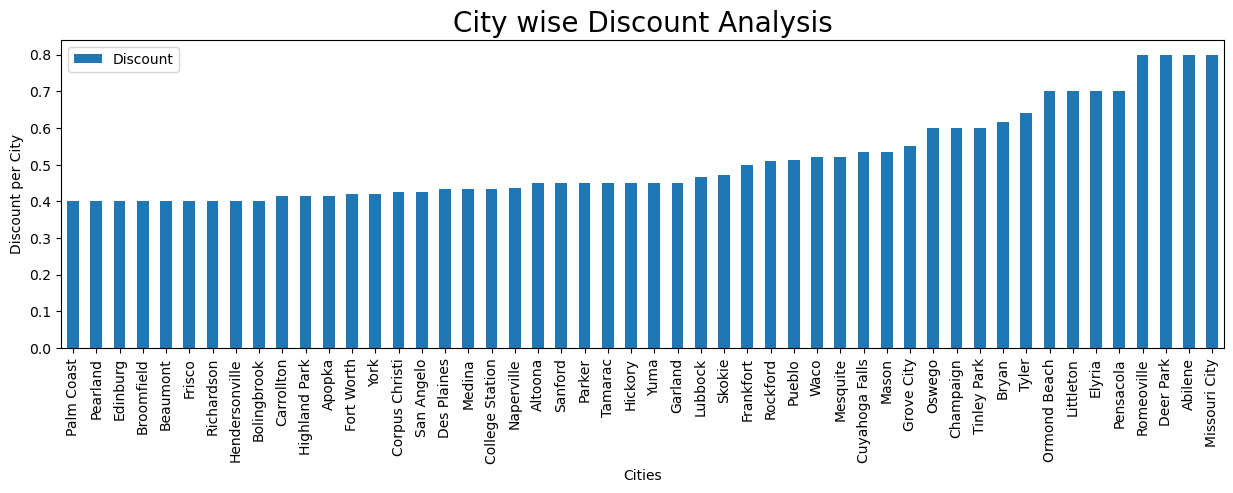

In [29]:
df_city_dis=df_city1.sort_values('Discount')
df_city_dis.tail(50)[['Discount']].plot(kind = 'bar', figsize = (15,4))
plt.title('City wise Discount Analysis', fontsize = 20)
plt.ylabel('Discount per City')
plt.xlabel('Cities')
plt.show()

Observations from City wise Analysis :-
* Highest Number of deal = New York City
* Highest Profit = Jamestown
* Lowest Profit = Bethlehem
* Highest amount of sales= San Marcos
* Highest discount offering = Romeoville, Deer Park, Abilene and Missouri City

* Shipmode wise Analysis

In [30]:
df_ship=df['Ship Mode'].value_counts()
df_ship

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

Text(0.5, 1.0, 'Shipping mode wise distribution of orders')

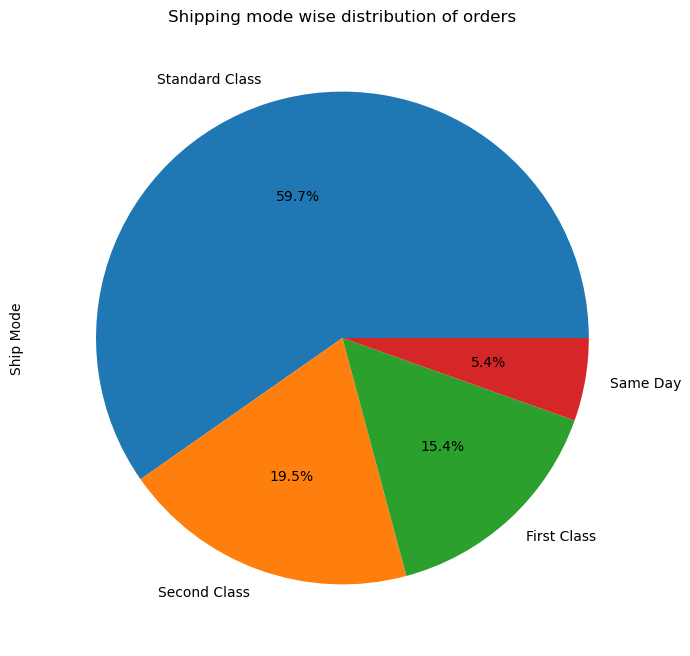

In [31]:
df_ship.plot(kind='pie',figsize=[8,8],autopct='%1.1f%%')
plt.title('Shipping mode wise distribution of orders')

In [32]:
df_shipmode = df.groupby(['Ship Mode'])[['Sales', 'Profit']].mean()
df_shipmode

,Sales,Profit
Ship Mode,,
First Class,228.497024,31.839948
Same Day,236.396179,29.266591
Second Class,236.089239,29.535545
Standard Class,227.583067,27.494770


array([<AxesSubplot: ylabel='Sales'>, <AxesSubplot: ylabel='Profit'>],
      dtype=object)

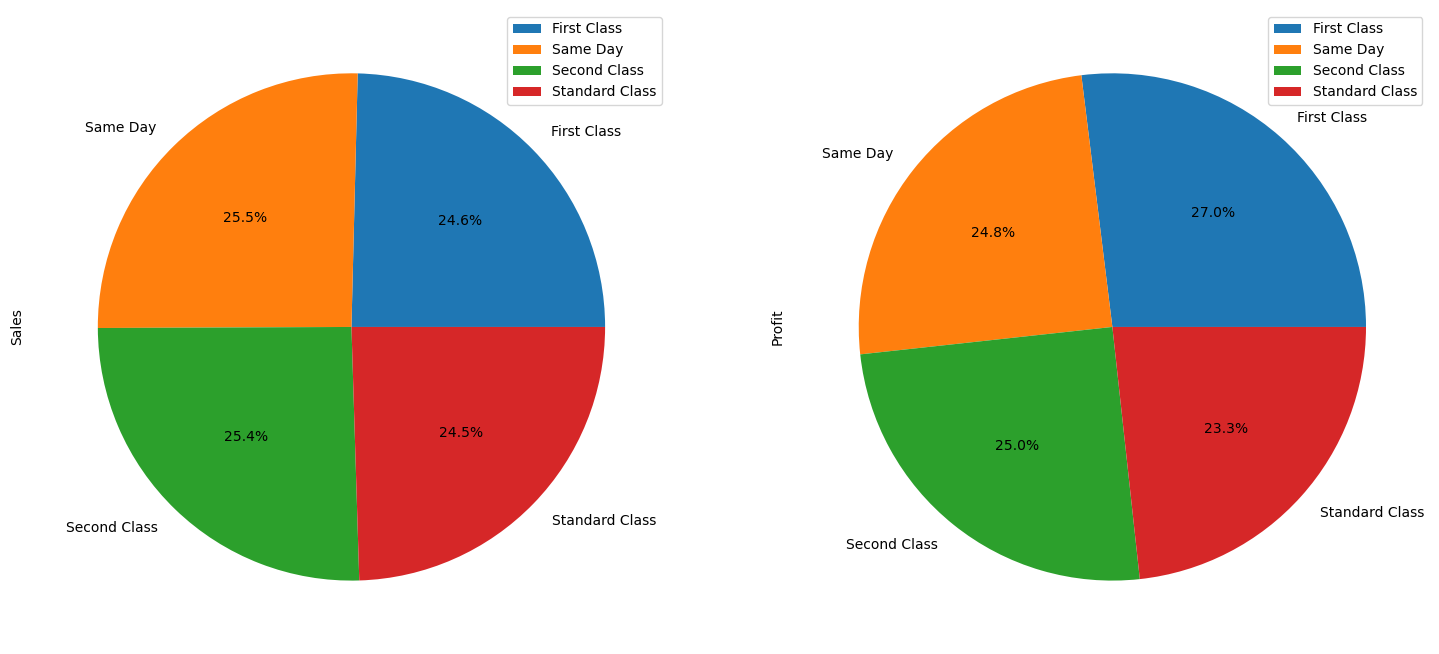

In [33]:
df_shipmode.plot.pie(subplots=True,
                     figsize=(18, 20), 
                     autopct='%1.1f%%', 
                     labels = df_shipmode.index)

Observations :
* Highly preferred mode = Standard Class (56.7 %)
* Least preferred mode = Same Day (5.4 %)
* Highest Sale = Same Day (25.5 %)
* Highest Profit = First Class (27 %)

* Sub-category Wise Analysis

In [34]:
df_sub=df['Sub-Category'].value_counts()
df_sub

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

Text(0.5, 1.0, 'Sub-category wise distribution of orders')

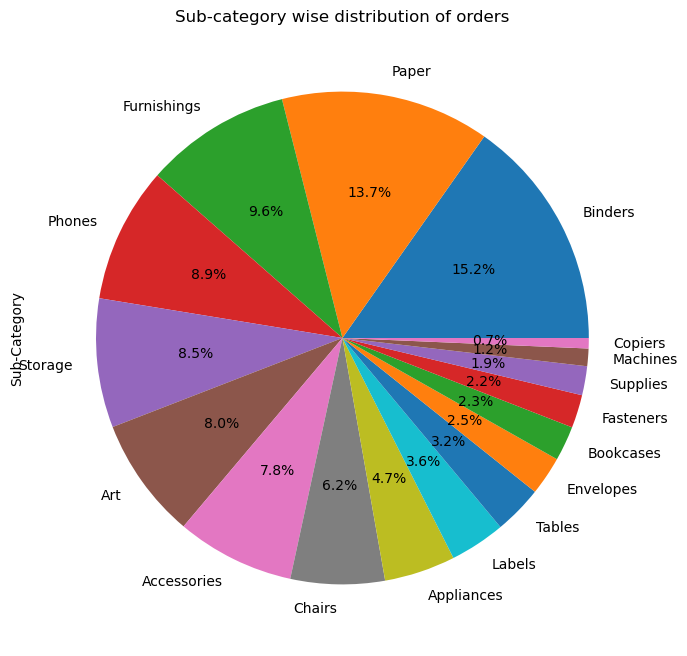

In [35]:
df_sub.plot(kind='pie',figsize=[8,8],autopct='%1.1f%%')
plt.title('Sub-category wise distribution of orders')

In [36]:
df_sub_sum=df.groupby("Sub-Category").sum()
df_sub_sum


C:\Users\adars\AppData\Local\Temp\ipykernel_9088\398189400.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sub_sum=df.groupby("Sub-Category").sum()


,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Accessories,167380.3180,2976,60.80,41936.6357
Appliances,107532.1610,1729,77.60,18138.0054
Art,27118.7920,3000,59.60,6527.7870
Binders,203412.7330,5974,567.00,30221.7633
Bookcases,114879.9963,868,48.14,-3472.5560
Chairs,328449.1030,2356,105.00,26590.1663
Copiers,149528.0300,234,11.00,55617.8249
Envelopes,16476.4020,906,20.40,6964.1767
Fasteners,3024.2800,914,17.80,949.5182


Text(0, 0.5, 'Total Sales/Profits')

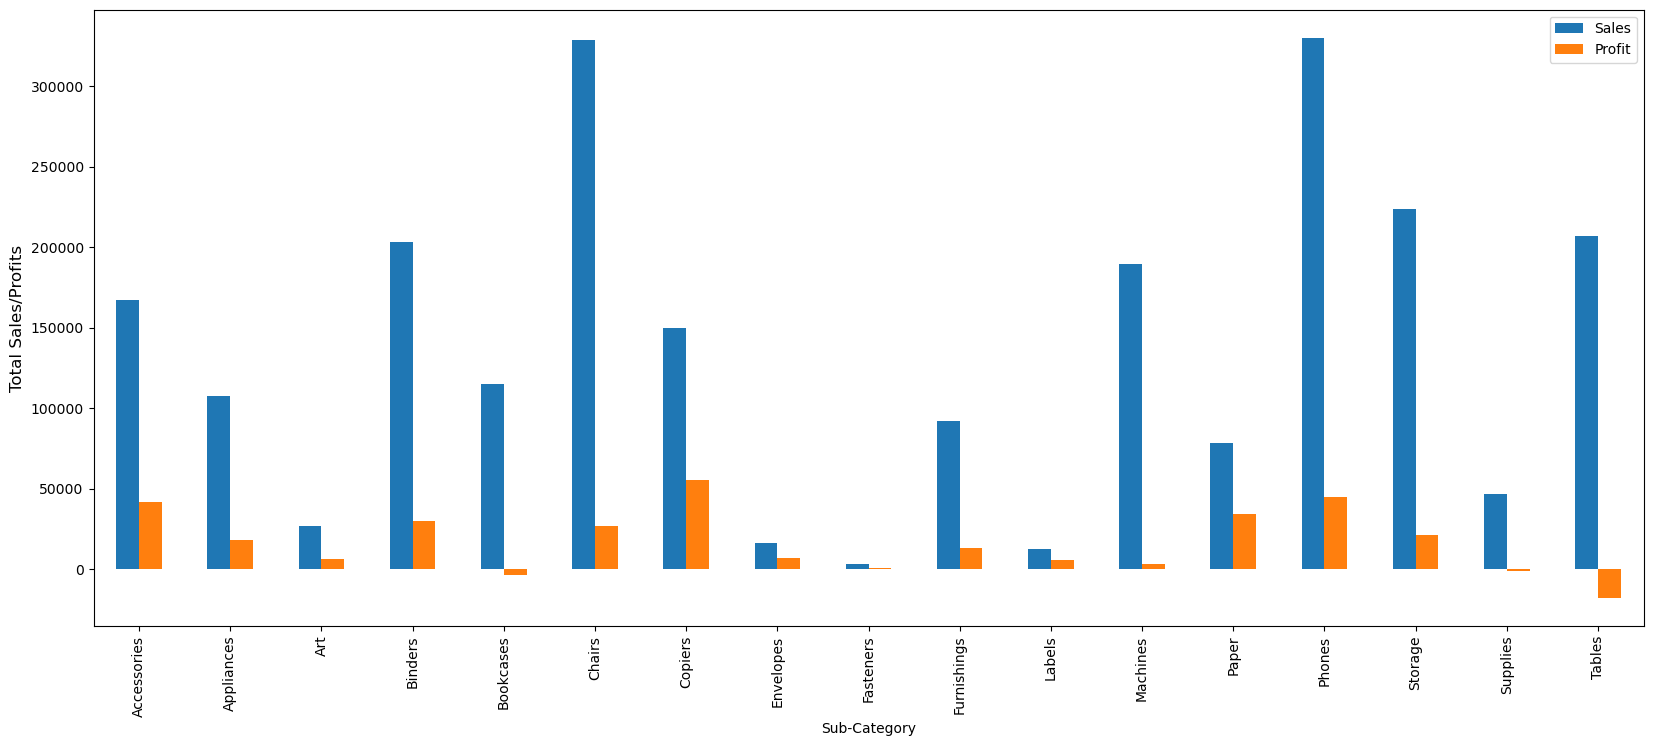

In [37]:
df_sub_sum[['Sales', 'Profit']].plot(kind = 'bar', figsize = [20,8])
plt.ylabel('Total Sales/Profits',fontsize = 12)

Observations :
* Highest Orders = Binders
* Lowest Orders = Copiers
* Highest Sales = Phones
* Lowest Sales = Fasteners
* Highest Profit = Copiers
* Lowest profit = Tables

* Discount Analysis

Text(0.5, 1.0, 'Discount V/S Profit')

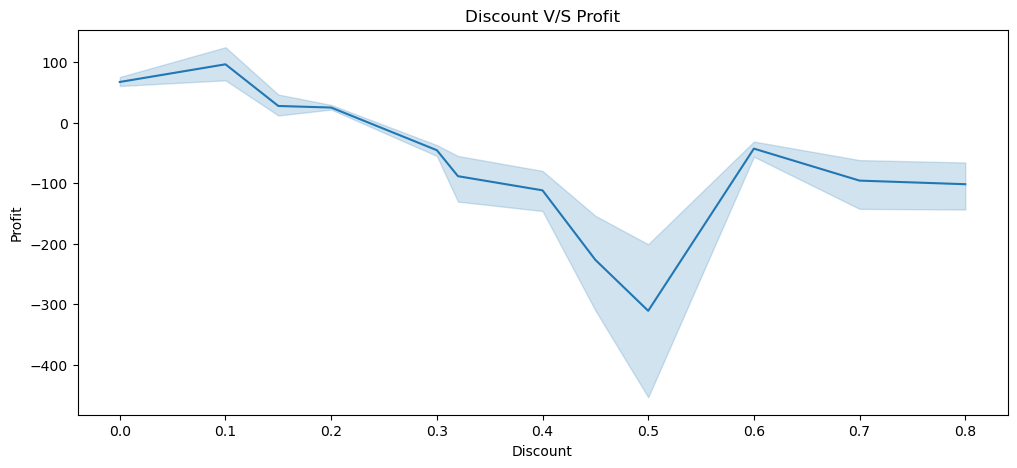

In [38]:
#Discount v/s Profit
plt.figure(figsize=(12,5))
sns.lineplot(x='Discount',y='Profit',data=df)
plt.title("Discount V/S Profit")

Text(0.5, 1.0, 'Discount V/S Sales')

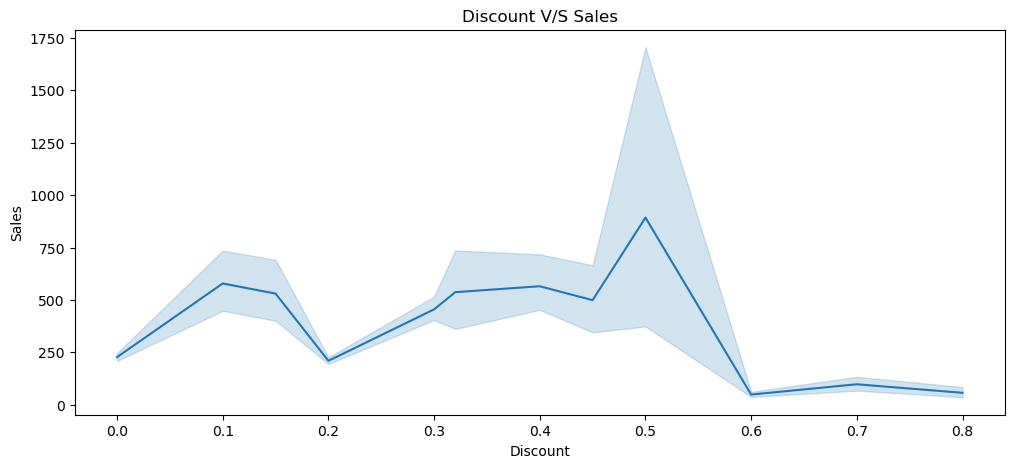

In [39]:
#Discount v/s Sales
plt.figure(figsize=(12,5))
sns.lineplot(x='Discount',y='Sales',data=df)
plt.title("Discount V/S Sales")

Observation: 
* High Discount results in Low Profit
* High Discount results in High Sales

Conclusion and Feedback :-
* Should increase sales in Vermount state for more Profit
* Should increase sales in NewYork City for more profit.
* Should increase sales of Technical products and decrease sales of furnitures for more profit
* Should sell lesser number of tables
* Should give lesser than 30% discount 